# Pandas로 분석하기

## 1. 미국 역대 대통령 신장 데이터

### 1-1. 파일 읽기

In [156]:
# Pandasm, Numpy import
import pandas as pd
import numpy as np

In [157]:
df = pd.read_csv( 'president_heights.csv', header = None )   # 파일 불러오기

In [158]:
df.head()                                                     # 불러온 데이터 확인하기

,0,1,2
0,order,name,height(cm)
1,1,George Washington,189
2,2,John Adams,170
3,3,Thomas Jefferson,189
4,4,James Madison,163


In [159]:
df.drop( [ 0 ], inplace = True )                                  # 불필요한 행 제거 

In [160]:
df.info()                   # 데이터 정보 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       42 non-null     object
 1   1       42 non-null     object
 2   2       42 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [161]:
df[ 0 ] = df[ 0 ].astype( 'int' )           # object형 자료를 int로 변환하기
df[ 2 ] = df[ 2 ].astype( 'int' )     
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       42 non-null     int32 
 1   1       42 non-null     object
 2   2       42 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 1008.0+ bytes


### 1-2. 변수 정의

In [162]:
df.head()

,0,1,2
1,1,George Washington,189
2,2,John Adams,170
3,3,Thomas Jefferson,189
4,4,James Madison,163
5,5,James Monroe,183


In [163]:
# 각 변수를 정의 하기
df.rename( columns = { 0 : 'order', 1 : 'name', 2 : 'height' }, inplace = True)
df.head()

,order,name,height
1,1,George Washington,189
2,2,John Adams,170
3,3,Thomas Jefferson,189
4,4,James Madison,163
5,5,James Monroe,183


### 1-3. 통계 및 분석

In [164]:
df.head()

,order,name,height
1,1,George Washington,189
2,2,John Adams,170
3,3,Thomas Jefferson,189
4,4,James Madison,163
5,5,James Monroe,183


In [165]:
# 키를 범주화 해서 큼, 중간, 작음으로 구분하기

In [166]:
count,bin_dividers = np.histogram( df[ 'height'], bins = 3 )

In [167]:
bin = [ '작음', '중간', '큼' ]
df[ 'class' ] = pd.cut( x = df[ 'height'],    # 데이터 배열
                         bins = bin_dividers,      # 경계값 리스트
                         labels = bin,       # bin 이름
                         include_lowest = True )

In [168]:
df.head()

,order,name,height,class
1,1,George Washington,189,큼
2,2,John Adams,170,작음
3,3,Thomas Jefferson,189,큼
4,4,James Madison,163,작음
5,5,James Monroe,183,중간


In [169]:
bin_dividers                                # 각 구간별 경계값

array([163., 173., 183., 193.])

In [170]:
# 큰 대통령만 골라서 보기
mask = ( df.height > 183 ) & ( df.height < 194 )
df_tall = df.loc[ mask ]
df_tall


,order,name,height,class
1,1,George Washington,189,큼
3,3,Thomas Jefferson,189,큼
7,7,Andrew Jackson,185,큼
16,16,Abraham Lincoln,193,큼
30,32,Franklin D. Roosevelt,188,큼
34,36,Lyndon B. Johnson,193,큼
38,40,Ronald Reagan,185,큼
39,41,George H. W. Bush,188,큼
40,42,Bill Clinton,188,큼
42,44,Barack Obama,185,큼


In [171]:
# 작은 대통령만 골라서 보기
mask = ( df.height > 162 ) & ( df.height < 174 )
df_short = df.loc[ mask ]
df_short

,order,name,height,class
2,2,John Adams,170,작음
4,4,James Madison,163,작음
6,6,John Quincy Adams,171,작음
8,8,Martin Van Buren,168,작음
9,9,William Henry Harrison,173,작음
11,11,James K. Polk,173,작음
12,12,Zachary Taylor,173,작음
18,18,Ulysses S. Grant,173,작음
22,23,Benjamin Harrison,168,작음
23,25,William McKinley,170,작음


### 1-4. 데이터 분석 시각화 

In [172]:
# 파이그래프
df.drop( [ 'order', 'name', 'height' ], axis = 1 ).head()
indexs = df[ 'class' ]
df.plot( kind = 'pie', index = indexs )

ValueError: pie requires either y column or 'subplots=True'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DEE0B5988>,
      dtype=object)

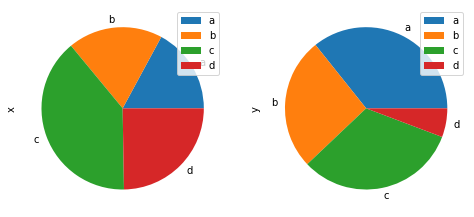

In [173]:
df1 = pd.DataFrame(3 * np.random.rand(4, 2),
                   index=['a', 'b', 'c', 'd'], columns=['x', 'y'])
df1.plot.pie(subplots=True, figsize=(8, 4))

In [174]:
df1

,x,y
a,1.136289,2.317720
b,1.254012,1.709054
c,2.608635,2.087962
d,1.643410,0.372099


In [175]:
# 위에 과정을 바탕으로 짜보려 했지만 실패

In [176]:
# 박스 그래프
df2 = dp.DataFrame( [df[]])

SyntaxError: invalid syntax (<ipython-input-176-ed68b90b4099>, line 2)

In [181]:
df3 = df.sort_values( by = 'class', ascending = True )
df3.head()

,order,name,height,class
18,18,Ulysses S. Grant,173,작음
12,12,Zachary Taylor,173,작음
11,11,James K. Polk,173,작음
23,25,William McKinley,170,작음
9,9,William Henry Harrison,173,작음


In [ ]:
# 인덱스 바꾸고 데이터프레임 다시 짜야해서 실패

In [ ]:
# 선그래프

In [185]:
df4 = df.drop( [ 'order', 'class' ], axis = 1 )
df4.head()

,name,height
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183


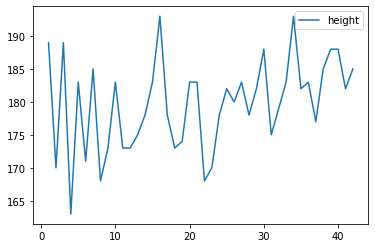

In [187]:
df4.plot()